[0.15822764 0.11271205 0.05794167 0.05443706 0.04335487 0.03767192
 0.0349922  0.02751116 0.02292302 0.01920428 0.01749242 0.01672538
 0.0146329  0.01360922 0.01213394 0.01178362 0.01125271 0.01033817
 0.00924314 0.00886514]


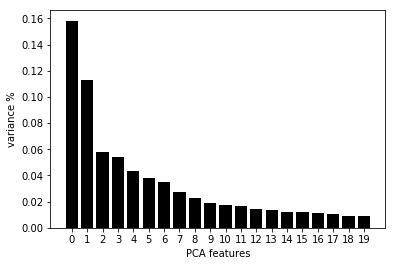

In [3]:
import mllogdpcommon
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

smilelogd, descriptors = mllogdpcommon.import_descriptor ("descriptors.txt")

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(descriptors)
print(pca.explained_variance_ratio_)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

plt.show()

In [4]:
# Da quello che vedo, anche se la varianza spiegata e' minima
# c'e' un drop dopo la seconda componente 

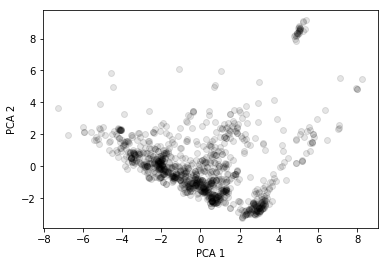

In [5]:
import pandas as pd

PCA_components = pd.DataFrame(principalComponents)

plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [54]:
# Diciamo che si vedono almeno tre clusters

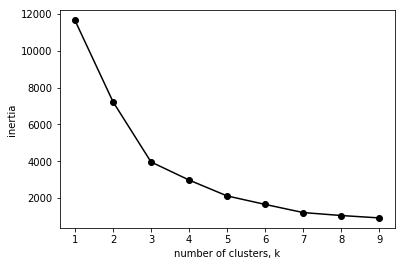

In [6]:
from sklearn.cluster import KMeans

ks = range(1, 10)

inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:2])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
# usando l'idea del punto di Elbow possiamo in effetti dire che ci sono tre cluster ben distinti 
# Quindi possiamo immaginare ad esempio di fare tre modelli distinti

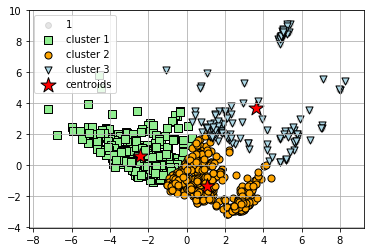

In [7]:
import numpy as np

# Using three clusters 
NC = 3

model = KMeans(n_clusters=NC)
   
X = PCA_components.iloc[:,:2].values

y_km = model.fit(X)

plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')

clusters = {}
for idx , l in enumerate(y_km.labels_):
    if l in clusters:
        clusters[l].append(X[idx])
    else:
        clusters[l] = []
        clusters[l].append(X[idx])
        
        
c1 = np.asarray(clusters[0])
plt.scatter(
    c1[:,0],c1[:,1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

c2 = np.asarray(clusters[1])
plt.scatter(
    c2[:,0],c2[:,1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

c3 = np.asarray(clusters[2])
plt.scatter(
    c3[:,0],c3[:,1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()
    